# Prediction visualization

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("data/test_predictions.csv", index_col=0)

In [5]:
df

,target,prediction
0,1,0.419140
1,0,0.631314
2,0,0.584801
3,1,0.544317
4,1,0.614725
...,...,...
3793,1,0.761875
3794,1,0.418440
3795,0,0.581922
3796,1,0.169792


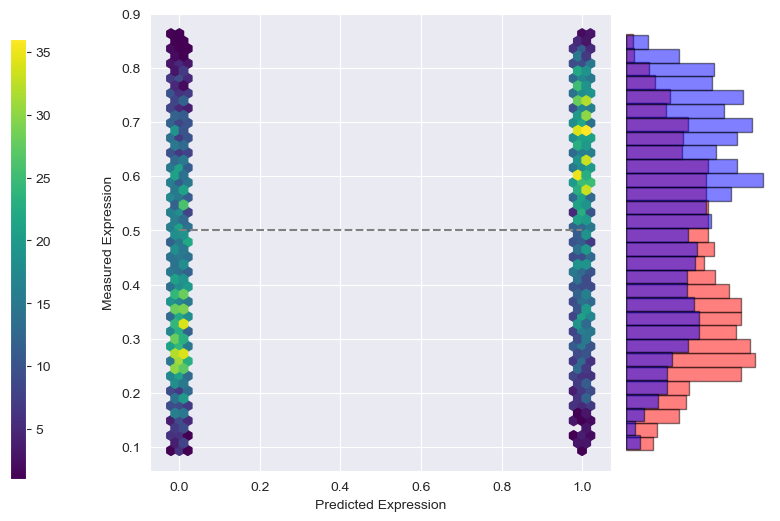

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

category_colors = {
    0: "red",
    1: "blue",
}

# Example data
np.random.seed(42)
x = df['target']
x_jitter = x + np.random.normal(0, 0.02, len(x))
x_jitter = np.clip(x_jitter, x - 0.02, x + 0.02)

y = df['prediction']

# Calculate correlations
pearson_corr, _ = pearsonr(x, y)
spearman_corr, _ = spearmanr(x, y)

# Create the figure
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(4, 4, hspace=0.1, wspace=0.1)

# Main plot
ax_main = fig.add_subplot(gs[1:4, 0:3])
hb = ax_main.hexbin(x_jitter, y, gridsize=50, cmap='viridis', mincnt=1)
# ax_main.plot([x.min(), x.max()], [x.min(), x.max()], 'gray', linestyle='--')
ax_main.plot([x.min(), x.max()], [0.5, 0.5], 'gray', linestyle='--')
ax_main.set_xlabel('Predicted Expression')
ax_main.set_ylabel('Measured Expression')

# Add colorbar on the left
cax = fig.add_axes([-0.05, 0.1, 0.02, 0.55])  # [left, bottom, width, height]
cb = fig.colorbar(hb, cax=cax, orientation='vertical')
# cb.set_label('Density')

# Add correlation text
# n_samples = len(x)
# ax_main.text(0.05, 0.95, f"Pearson's r = {pearson_corr:.3f}\nSpearman's r = {spearman_corr:.2f}\nN = {n_samples}",
#              transform=ax_main.transAxes, verticalalignment='top', fontsize=12)

# Top histogram
# ax_top = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
# ax_top.hist(x, bins=30, color='gray', edgecolor='black', alpha=0.7)
# ax_top.axis('off')

# Right histogram (rotated)
ax_right = fig.add_subplot(gs[1:4, 3], sharey=ax_main)
# ax_right.hist(y, bins=30, color='gray', edgecolor='black', alpha=0.7, orientation='horizontal')
for category in np.unique(x):
    group_y = y[x == category]
    ax_right.hist(group_y, bins=30, color=category_colors[category], edgecolor='black', alpha=0.5, orientation='horizontal', label=category)

ax_right.axis('off')

plt.show()


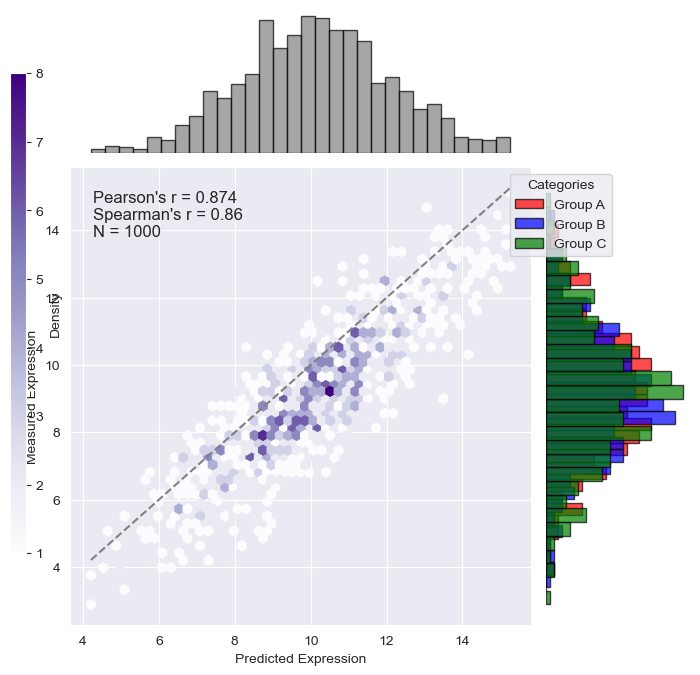

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Example data
np.random.seed(42)
categories = np.random.choice(['Group A', 'Group B', 'Group C'], size=1000)
x = np.random.normal(loc=10, scale=2, size=1000)
y = 0.9 * x + np.random.normal(scale=1, size=1000)

# Map categories to colors
category_colors = {
    'Group A': 'red',
    'Group B': 'blue',
    'Group C': 'green'
}

# Create the figure
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(4, 4, hspace=0.1, wspace=0.1)

# Main plot
ax_main = fig.add_subplot(gs[1:4, 0:3])
hb = ax_main.hexbin(x, y, gridsize=50, cmap='Purples', mincnt=1)
ax_main.plot([x.min(), x.max()], [x.min(), x.max()], 'gray', linestyle='--')
ax_main.set_xlabel('Predicted Expression')
ax_main.set_ylabel('Measured Expression')

# Add colorbar on the left
cax = fig.add_axes([0.05, 0.2, 0.02, 0.6])  # [left, bottom, width, height]
cb = fig.colorbar(hb, cax=cax, orientation='vertical')
cb.set_label('Density')

# Add correlation text
pearson_corr, _ = pearsonr(x, y)
spearman_corr, _ = spearmanr(x, y)
n_samples = len(x)
ax_main.text(0.05, 0.95, f"Pearson's r = {pearson_corr:.3f}\nSpearman's r = {spearman_corr:.2f}\nN = {n_samples}",
             transform=ax_main.transAxes, verticalalignment='top', fontsize=12)

# Top histogram
ax_top = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_top.hist(x, bins=30, color='gray', edgecolor='black', alpha=0.7)
ax_top.axis('off')

# Right histogram (grouped colors)
ax_right = fig.add_subplot(gs[1:4, 3], sharey=ax_main)
for category in np.unique(categories):
    group_y = y[categories == category]
    ax_right.hist(group_y, bins=30, color=category_colors[category], edgecolor='black', alpha=0.7, orientation='horizontal', label=category)

ax_right.axis('off')
ax_right.legend(loc='upper left', bbox_to_anchor=(-0.3, 1.0), title="Categories")

plt.show()
